# Naive_Bayes (GaussianNB)

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# Importing the dataset
dataset = pd.read_csv("C:\\Users\\Dell\\Documents\\Social_Network_Ads.csv")


In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,19598943,Male,35,134000,1
1,15694829,Female,32,150000,1
2,15735878,Male,52,150000,1
3,15675949,Female,33,149000,1
4,15701537,Male,42,149000,1


In [4]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [5]:
X

array([[    35, 134000],
       [    32, 150000],
       [    52, 150000],
       [    33, 149000],
       [    42, 149000],
       [    29, 148000],
       [    35, 147000],
       [    51, 146000],
       [    37, 146000],
       [    37, 144000],
       [    36, 144000],
       [    47, 144000],
       [    58, 144000],
       [    59, 143000],
       [    53, 143000],
       [    40, 142000],
       [    48, 141000],
       [    49, 141000],
       [    44, 139000],
       [    48, 138000],
       [    52, 138000],
       [    27, 137000],
       [    37, 137000],
       [    30, 135000],
       [    32, 135000],
       [    39, 134000],
       [    48, 134000],
       [    39, 134000],
       [    51, 134000],
       [    56, 133000],
       [    43, 133000],
       [    45, 131000],
       [    48, 131000],
       [    55, 130000],
       [    59, 130000],
       [    43, 129000],
       [    36, 126000],
       [    55, 125000],
       [    36, 125000],
       [    28, 123000],


In [6]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 666)



In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [19]:
X_train

array([[-0.80290756,  0.40590126],
       [-1.08673192,  0.31667041],
       [ 0.0485655 , -0.24845837],
       [-0.61369133,  0.13820869],
       [ 1.37307915,  2.04180035],
       [-0.23525885, -1.40845954],
       [-0.9921238 , -0.33768923],
       [ 0.42699797,  0.28692679],
       [-1.46516439, -1.52743402],
       [ 0.61621421, -0.90281801],
       [-0.04604262,  2.27974931],
       [ 2.03533598, -1.2002542 ],
       [ 0.23778174,  0.16795231],
       [-0.14065074, -0.57563819],
       [-1.5597725 ,  0.55461936],
       [-1.37055627, -1.46794678],
       [ 0.90003856, -1.46794678],
       [-1.65438062,  0.49513212],
       [-0.89751568, -0.42692009],
       [ 0.99464668, -0.84333077],
       [ 0.90003856,  2.22026207],
       [ 0.23778174,  0.16795231],
       [ 0.80543044, -0.30794561],
       [-0.61369133, -1.52743402],
       [-0.42447509, -0.78384353],
       [ 2.03533598,  1.8038514 ],
       [ 0.33238985, -0.72435629],
       [ 0.23778174, -0.36743285],
       [-1.74898874,

In [20]:
y_test

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [21]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)



GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [23]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

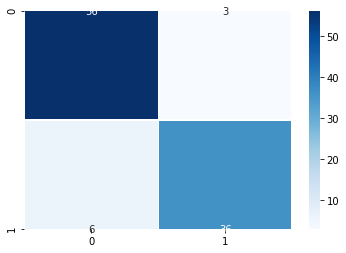

In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,recall_score
recall_score= recall_score(y_test,y_pred)*100
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, linewidths=0.2, cmap='Blues')

In [30]:
# Printing the accuracies
print("Total rows = {}".format(cm.sum()))
print("Correct Answers = {}".format(cm.diagonal().sum()))
print("Accuracy = {}%".format((cm.diagonal().sum()/cm.sum()) * 100))
print("Recall_score= {}%".format(recall_score))

Total rows = 101
Correct Answers = 92
Accuracy = 91.0891089108911%
Recall_score= 85.71428571428571%
